In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [160]:
path = "C:/Users/hjhhi/Desktop/Codes/Data_analysis_practice/Dacon/data/Dacon_shoppingmall/dataset"
train = pd.read_csv(path+"/train.csv")
test = pd.read_csv(path+"/test.csv")
submission = pd.read_csv(path+"/sample_submission.csv")

In [161]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [162]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


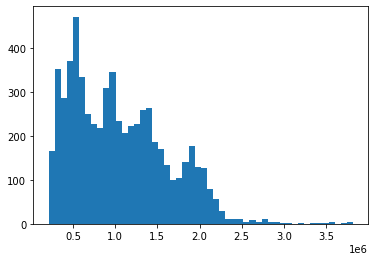

In [164]:
plt.hist(train.Weekly_Sales, bins=50)
plt.show()

In [165]:
train = train.fillna(0)
test = test.fillna(0)

In [166]:
train["Day"] = train["Date"].str.split("/", expand=True)[0]
train["Month"] = train["Date"].str.split("/", expand=True)[1]
train["Year"] = train["Date"].str.split("/", expand=True)[2]

In [167]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,05,02,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,02,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,02,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,02,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,08,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,07,09,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,09,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,09,2012


In [168]:
test["Day"] = test["Date"].str.split("/", expand=True)[0]
test["Month"] = test["Date"].str.split("/", expand=True)[1]
test["Year"] = test["Date"].str.split("/", expand=True)[2]

# Model selection

In [169]:
X_train = train.drop(["Date", "Weekly_Sales", "id"], axis=1)
y_train = train["Weekly_Sales"]
test = test.drop(["Date", "id"], axis=1)

In [170]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [171]:
model = RandomForestRegressor(oob_score=True)
model.fit(X_train, y_train)
1-model.oob_score_ 

0.050151181131668054

In [172]:
pd.DataFrame(index=X_train.columns,data=model.feature_importances_)

,0
Store,0.736660
Temperature,0.013005
Fuel_Price,0.017094
Promotion1,0.005109
Promotion2,0.001409
Promotion3,0.011764
Promotion4,0.008172
Promotion5,0.029087
Unemployment,0.133488
IsHoliday,0.002518


In [173]:
submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [174]:
submission["Weekly_Sales"] = model.predict(test)

In [175]:
submission.to_csv('./submission.csv',index = False)

In [176]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,05,02,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,02,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,02,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,02,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,08,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,07,09,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,09,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,09,2012


In [177]:
test

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Day,Month,Year
0,1,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False,05,10,2012
1,1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False,12,10,2012
2,1,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False,19,10,2012
3,1,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,26,10,2012
4,2,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False,05,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False,26,10,2012
176,45,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False,05,10,2012
177,45,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False,12,10,2012
178,45,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False,19,10,2012
